In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import DataFrame

In [4]:
df = pd.read_csv('full.csv')
df.head()

,Unnamed: 0,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,...,languages.INI,languages.JSON,languages.Markdown,languages.Odin,languages.XML,languages.YAML,languages.Scilab,languages.SMT,languages.SQL,languages.SRecode Template
0,0,mislav/hub,46,1035,150.0,2018,MIT,3337,2009-12-05,244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,getlantern/lantern,893,398278,138.0,0,NaN,6252,2011-02-17,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,direnv/direnv,37,666,171.0,664,MIT,1132,2011-01-04,213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,patrickmn/go-cache,2,1,248.0,92,MIT,163,2012-01-02,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,miekg/dns,39,741,1746.0,605,BSD-3-Clause,4173,2010-08-03,227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[['analyzed_paths', 'pairs', 'similarities']].describe()

,analyzed_paths,pairs,similarities
count,13703.000000,1.370300e+04,10467.000000
mean,76.884259,5.942503e+04,154.098596
std,336.190415,1.930047e+06,1014.191085
min,2.000000,1.000000e+00,0.000000
25%,6.000000,1.500000e+01,7.000000
50%,17.000000,1.360000e+02,30.000000
75%,51.000000,1.275000e+03,117.000000
max,18370.000000,1.687193e+08,80513.000000


In [5]:
repos_fc_df = pd.read_json('repos_total_functions.json')
repos_fc_df.head()

,repo_id,total_functions
0,mislav/hub,637
1,getlantern/lantern,16802
2,revel/revel,851
3,direnv/direnv,221
4,patrickmn/go-cache,178


In [6]:
df_merged = pd.merge(repos_fc_df, df, on="repo_id")
df_merged.head()

,repo_id,total_functions,Unnamed: 0,analyzed_paths,pairs,similarities,issues,license,commits,created_at,...,languages.INI,languages.JSON,languages.Markdown,languages.Odin,languages.XML,languages.YAML,languages.Scilab,languages.SMT,languages.SQL,languages.SRecode Template
0,mislav/hub,637,0,46,1035,150.0,2018,MIT,3337,2009-12-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,getlantern/lantern,16802,0,893,398278,138.0,0,NaN,6252,2011-02-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direnv/direnv,221,0,37,666,171.0,664,MIT,1132,2011-01-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,patrickmn/go-cache,178,0,2,1,248.0,92,MIT,163,2012-01-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,miekg/dns,1595,0,39,741,1746.0,605,BSD-3-Clause,4173,2010-08-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_merged['clone_density'] = (df_merged['similarities'] / df_merged['total_functions']) * 100
df_merged.head()

,repo_id,total_functions,Unnamed: 0,analyzed_paths,pairs,similarities,issues,license,commits,created_at,...,languages.JSON,languages.Markdown,languages.Odin,languages.XML,languages.YAML,languages.Scilab,languages.SMT,languages.SQL,languages.SRecode Template,clone_density
0,mislav/hub,637,0,46,1035,150.0,2018,MIT,3337,2009-12-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.547881
1,getlantern/lantern,16802,0,893,398278,138.0,0,NaN,6252,2011-02-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821331
2,direnv/direnv,221,0,37,666,171.0,664,MIT,1132,2011-01-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.375566
3,patrickmn/go-cache,178,0,2,1,248.0,92,MIT,163,2012-01-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.325843
4,miekg/dns,1595,0,39,741,1746.0,605,BSD-3-Clause,4173,2010-08-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.467085


In [12]:
df_merged['clone_density'].describe(

count    10467.000000
mean        45.791091
std        119.362258
min          0.000000
25%          8.333333
50%         22.480620
75%         47.881193
max       6982.914137
Name: clone_density, dtype: float64

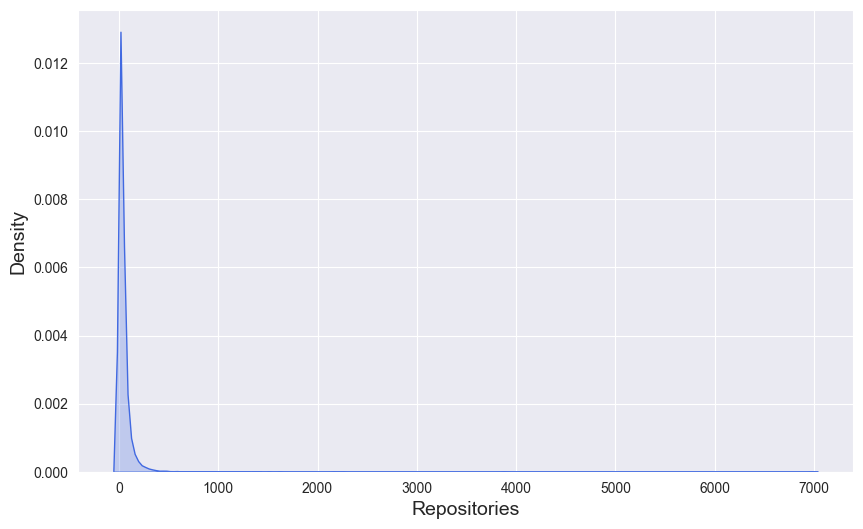

In [11]:
plt.figure(figsize=(10, 6))

sb.kdeplot(df_merged['clone_density'], fill=True, color='royalblue')

plt.xlabel('Repositories', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

In [10]:
df_merged['clone_density'].describe()

count    10467.000000
mean        45.791091
std        119.362258
min          0.000000
25%          8.333333
50%         22.480620
75%         47.881193
max       6982.914137
Name: clone_density, dtype: float64